# Data Understanding

In [ ]:
import pandas as pd
import seaborn as sns


info_tourism = pd.read_csv("/content/tourism_with_id.csv")
tourism_rating = pd.read_csv("/content/tourism_rating.csv")
users = pd.read_csv("/content/user.csv")

In [ ]:
info_tourism.sample(5)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
115,116,Jurang Tembelan Kanigoro,Jurang Tembelan Kanigoro berada di Desa Wisata...,Taman Hiburan,Yogyakarta,2500,4.5,45.0,"{'lat': -7.940106500000001, 'lng': 110.4300062}",-7.940106,110.430006,NaN,116
244,245,Jendela Alam,Tidak hanya menikmati alam sekitar yang masih ...,Taman Hiburan,Bandung,20000,4.4,150.0,"{'lat': -6.819604, 'lng': 107.5964519}",-6.819604,107.596452,NaN,245
334,335,Candi Gedong Songo,Candi Gedong Songo (bahasa Jawa: ꦕꦤ꧀ꦝꦶ​ꦒꦼꦝꦺꦴꦁ​...,Budaya,Semarang,10000,4.5,NaN,"{'lat': -7.209886700000002, 'lng': 110.3421119}",-7.209887,110.342112,NaN,335
165,166,Kebun Teh Nglinggo,Wisata Kebun Teh Nglinggo adalah satu-satunya ...,Cagar Alam,Yogyakarta,6000,4.5,NaN,"{'lat': -7.647054, 'lng': 110.1414699}",-7.647054,110.141470,NaN,166
352,353,Taman Srigunting,Merupakan salah satu landmark di Kawasan Kota ...,Taman Hiburan,Semarang,0,4.7,NaN,"{'lat': -6.9681728, 'lng': 110.4278262}",-6.968173,110.427826,NaN,353


 Select 5 random rows from the DataFrame. This helps in assessing the variability and distribution of data within the DataFrame

In [ ]:
tourism_rating.sample(5)

,User_Id,Place_Id,Place_Ratings
5264,159,35,3
7924,238,5,2
4437,135,209,1
8802,265,144,2
3522,107,240,5


In [ ]:
users.sample(5)

,User_Id,Location,Age
264,265,"Jakarta Timur, DKI Jakarta",30
153,154,"Bandung, Jawa Barat",31
143,144,"Depok, Jawa Barat",18
183,184,"Serang, Banten",30
200,201,"Bekasi, Jawa Barat",21



These print statements provide insights into the datasets:

Number of unique places in the tourism dataset.
Number of unique users in the user dataset.
Total number of ratings in the tourism rating dataset.

In [ ]:
print(f"Number of places in the datasets : {len(info_tourism.Place_Id.unique())}")
print(f"Number of users : {len(users.User_Id.unique())}")
print(f"The number of ratings given by the user to the dataset : {len(tourism_rating.User_Id)}")

Number of places in the datasets : 437
Number of users : 300
The number of ratings given by the user to the dataset : 10000


# Exploratory Data Analysis

In [ ]:
info_tourism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


In [ ]:
info_tourism.isnull().sum()

Place_Id          0
Place_Name        0
Description       0
Category          0
City              0
Price             0
Rating            0
Time_Minutes    232
Coordinate        0
Lat               0
Long              0
Unnamed: 11     437
Unnamed: 12       0
dtype: int64

In [ ]:
tourism_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [ ]:
tourism_rating.isnull().sum()

User_Id          0
Place_Id         0
Place_Ratings    0
dtype: int64

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


In [ ]:
users.isnull().sum()

User_Id     0
Location    0
Age         0
dtype: int64

In [ ]:
info_tourism.Category.unique()

array(['Budaya', 'Taman Hiburan', 'Cagar Alam', 'Bahari',
       'Pusat Perbelanjaan', 'Tempat Ibadah'], dtype=object)

# Data Preprocessing

In [ ]:
import numpy as np

tourism_all = np.concatenate((
    info_tourism.Place_Id.unique(),
    tourism_rating.Place_Id.unique()
))

tourism_all = np.sort(np.unique(tourism_all))

print(f"Total number of tourism: {len(tourism_all)}")

Total number of tourism: 437


In [ ]:
all_tourism_rate = tourism_rating
all_tourism_rate

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


This line merges two DataFrames (all_tourism_rate and a subset of columns from info_tourism) on the 'Place_Id' column using a left join, creating a new DataFrame named all_tourism, and then displays its contents

In [ ]:
all_tourism = pd.merge(all_tourism_rate,info_tourism[["Place_Id","Place_Name","Description","City","Category"]],on='Place_Id', how='left')
all_tourism

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya
...,...,...,...,...,...,...,...
9995,300,425,2,Waterpark Kenjeran Surabaya,Waterpark Kenjeran Surabaya merupakan wisata k...,Surabaya,Taman Hiburan
9996,300,64,4,Museum Sasmita Loka Ahmad Yani,Museum Sasmita Loka Ahmad Yani adalah salah sa...,Jakarta,Budaya
9997,300,311,3,The Lodge Maribaya,The Lodge Maribaya adalah salah satu tempat wi...,Bandung,Cagar Alam
9998,300,279,4,Masjid Agung Trans Studio Bandung,Masjid Agung Trans Studio Bandung (TSB) berdir...,Bandung,Tempat Ibadah


In [ ]:
all_tourism['city_category'] = all_tourism[['City','Category']].agg(' '.join,axis=1)

In [ ]:
all_tourism

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category,city_category
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya,Yogyakarta Budaya
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari,Semarang Bahari
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan,Jakarta Taman Hiburan
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya,Semarang Budaya
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya,Yogyakarta Budaya
...,...,...,...,...,...,...,...,...
9995,300,425,2,Waterpark Kenjeran Surabaya,Waterpark Kenjeran Surabaya merupakan wisata k...,Surabaya,Taman Hiburan,Surabaya Taman Hiburan
9996,300,64,4,Museum Sasmita Loka Ahmad Yani,Museum Sasmita Loka Ahmad Yani adalah salah sa...,Jakarta,Budaya,Jakarta Budaya
9997,300,311,3,The Lodge Maribaya,The Lodge Maribaya adalah salah satu tempat wi...,Bandung,Cagar Alam,Bandung Cagar Alam
9998,300,279,4,Masjid Agung Trans Studio Bandung,Masjid Agung Trans Studio Bandung (TSB) berdir...,Bandung,Tempat Ibadah,Bandung Tempat Ibadah


# Data Preparation

## Missing Values

In [ ]:
all_tourism.isnull().sum()

User_Id          0
Place_Id         0
Place_Ratings    0
Place_Name       0
Description      0
City             0
Category         0
city_category    0
dtype: int64

In [ ]:
preparation= all_tourism.drop_duplicates("Place_Id")
preparation

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category,city_category
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya,Yogyakarta Budaya
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari,Semarang Bahari
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan,Jakarta Taman Hiburan
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya,Semarang Budaya
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya,Yogyakarta Budaya
...,...,...,...,...,...,...,...,...
2008,62,370,1,Benteng Pendem,Benteng Pendem Cilacap (bahasa Belanda: Kustba...,Semarang,Budaya,Semarang Budaya
2399,74,350,4,Pantai Cipta,Pantai Cipta juga dikenal sebagai Pantai Petik...,Semarang,Bahari,Semarang Bahari
2448,75,10,2,Pulau Tidung,Pulau Tidung adalah salah satu kelurahan di ke...,Jakarta,Bahari,Jakarta Bahari
2534,78,7,4,Kebun Binatang Ragunan,Kebun Binatang Ragunan adalah sebuah kebun bin...,Jakarta,Cagar Alam,Jakarta Cagar Alam


In [ ]:
place_id = preparation.Place_Id.tolist()

place_name = preparation.Place_Name.tolist()

place_category = preparation.Category.tolist()

place_desc = preparation.Description.tolist()

place_city = preparation.City.tolist()

city_category = preparation.city_category.tolist()

This code creates a new DataFrame named tourism_new from given lists, with columns 'id', 'name', 'category', 'description', 'city', and 'city_category', and then displays the DataFrame.








In [ ]:
tourism_new = pd.DataFrame({
    "id":place_id,
    "name":place_name,
    "category":place_category,
    "description":place_desc,
    "city":place_city,
    "city_category":city_category
})

tourism_new

,id,name,category,description,city,city_category
0,179,Candi Ratu Boko,Budaya,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Yogyakarta Budaya
1,344,Pantai Marina,Bahari,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Semarang Bahari
2,5,Atlantis Water Adventure,Taman Hiburan,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Jakarta Taman Hiburan
3,373,Museum Kereta Ambarawa,Budaya,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Semarang Budaya
4,101,Kampung Wisata Sosro Menduran,Budaya,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Yogyakarta Budaya
...,...,...,...,...,...,...
432,370,Benteng Pendem,Budaya,Benteng Pendem Cilacap (bahasa Belanda: Kustba...,Semarang,Semarang Budaya
433,350,Pantai Cipta,Bahari,Pantai Cipta juga dikenal sebagai Pantai Petik...,Semarang,Semarang Bahari
434,10,Pulau Tidung,Bahari,Pulau Tidung adalah salah satu kelurahan di ke...,Jakarta,Jakarta Bahari
435,7,Kebun Binatang Ragunan,Cagar Alam,Kebun Binatang Ragunan adalah sebuah kebun bin...,Jakarta,Jakarta Cagar Alam


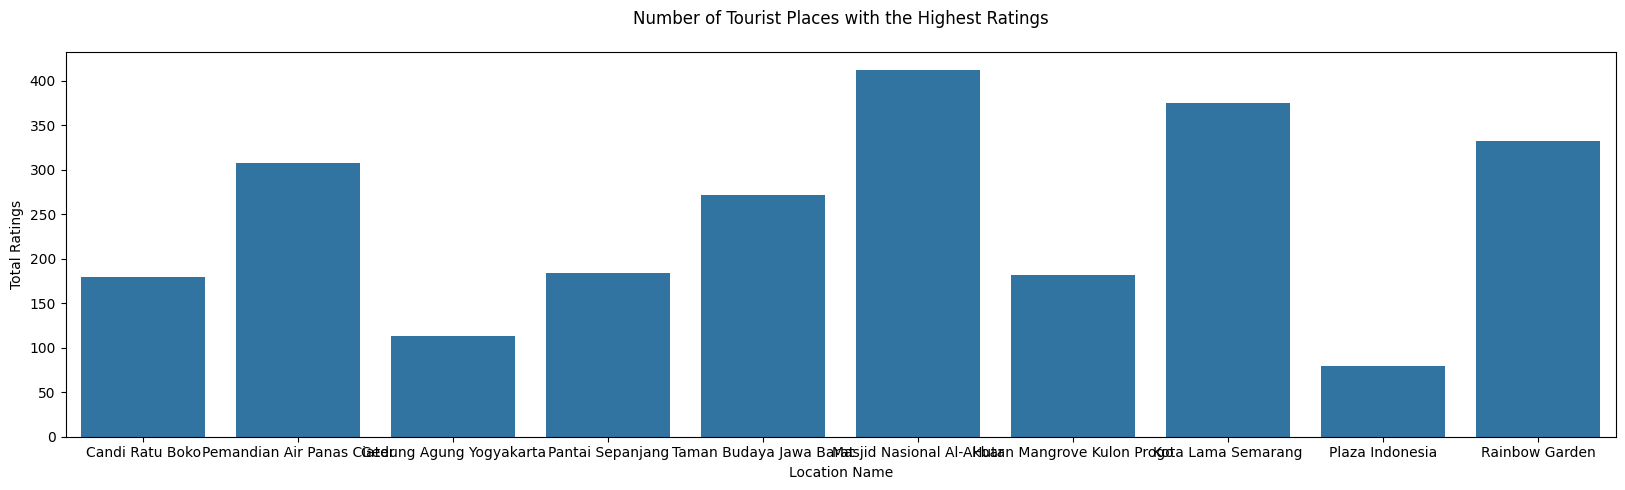

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'tourism_new' and 'preparation' are your DataFrames

# Assuming 'tourism_new' has columns 'id' and 'Place_Id'
top_10 = tourism_new['id'].value_counts().reset_index().head(10)
top_10 = pd.merge(top_10, preparation[['Place_Id', 'Place_Name']], how='left', left_on='id', right_on='Place_Id')

# Membuat visualisasi wisata dengan jumlah rating terbanyak
plt.figure(figsize=(20, 5))
sns.barplot(x='Place_Name', y='id', data=top_10)
plt.title('Number of Tourist Places with the Highest Ratings', pad=20)
plt.ylabel('Total Ratings')
plt.xlabel('Location Name')
plt.show()

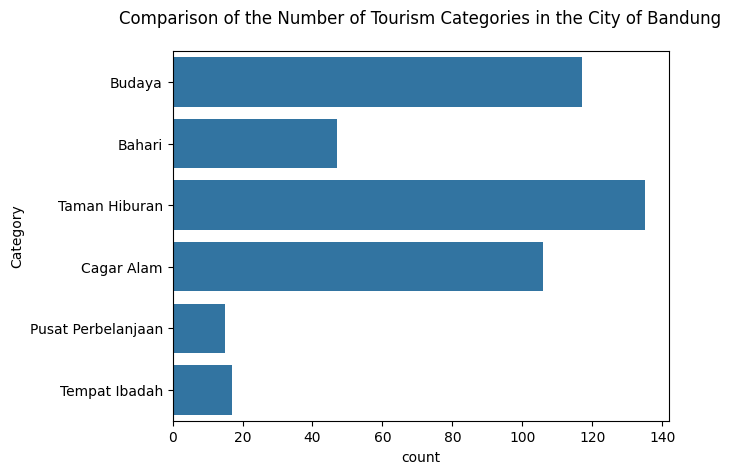

In [77]:
sns.countplot(y='Category', data=preparation)
plt.title('Comparison of the Number of Tourism Categories in the City of Bandung', pad=20)
plt.show()

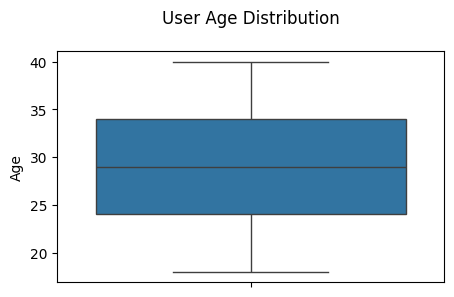

In [75]:
plt.figure(figsize=(5,3))
sns.boxplot(users['Age']);
plt.title('User Age Distribution', pad=20)
plt.show()

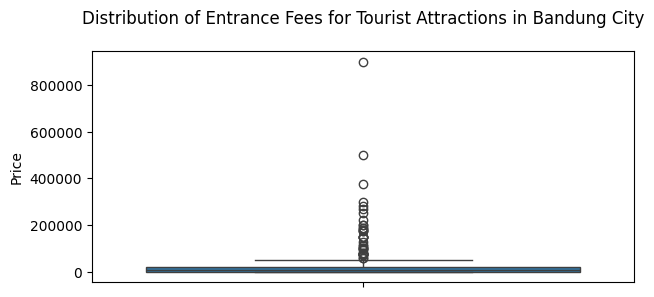

In [74]:
plt.figure(figsize=(7,3))
sns.boxplot(info_tourism['Price'])
plt.title('Distribution of Entrance Fees for Tourist Attractions in Bandung City', pad=20)
plt.show()

This code snippet visualizes the distribution of users' origin cities by counting the occurrences of each city and plotting them using a horizontal bar chart.








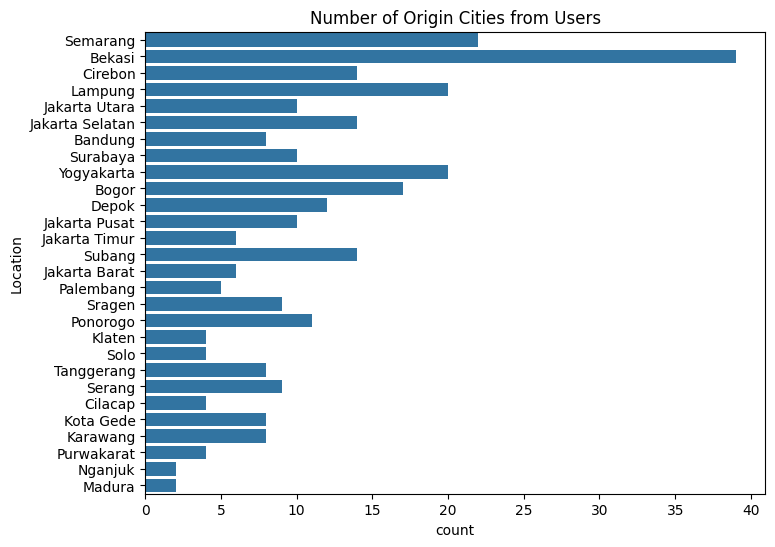

In [73]:
askot = users['Location'].apply(lambda x : x.split(',')[0])

# Visualize the origin cities of users
plt.figure(figsize=(8,6))
sns.countplot(y=askot)
plt.title('Number of Origin Cities from Users')
plt.show()

####

# Content Based Filtering

Content-based filtering recommends items to users based on the similarity between the items' features and the user's preferences.


In [ ]:
data = tourism_new
data.sample(5)

,id,name,category,description,city,city_category
69,249,Upside Down World Bandung,Taman Hiburan,Upside Down World Bandung pertama kali dibuka ...,Bandung,Bandung Taman Hiburan
429,361,Wisata Kampung Krisan Clapar,Taman Hiburan,Wisata Kampung Krisan Gemah Ripah di Dusun Cla...,Semarang,Semarang Taman Hiburan
9,393,Taman Harmoni Keputih,Cagar Alam,Tempat tersebut ialah Taman Hatmoni Keputih Su...,Surabaya,Surabaya Cagar Alam
232,139,Puncak Gunung Api Purba - Nglanggeran,Cagar Alam,Gunung Nglanggeran adalah sebuah gunung di Dae...,Yogyakarta,Yogyakarta Cagar Alam
220,11,Pulau Bidadari,Bahari,Pulau Bidadari merupakan salah satu resor di K...,Jakarta,Jakarta Bahari


## TF-IDF Vectorizer

TF-IDF vectorization converts text data into numerical vectors, and cosine similarity measures the similarity between these vectors.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

cv.fit(data['city_category'])

print("Features Name: ", list(cv.vocabulary_.keys()))

Features Name:  ['yogyakarta', 'budaya', 'semarang', 'bahari', 'jakarta', 'taman', 'hiburan', 'bandung', 'cagar', 'alam', 'surabaya', 'pusat', 'perbelanjaan', 'tempat', 'ibadah']


In [ ]:
cv_matrix = cv.transform(data['city_category'])

cv_matrix.shape

(437, 15)

In [ ]:
cv_matrix.todense()

matrix([[0, 0, 0, ..., 0, 0, 1],
        [0, 1, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        ...,
        [0, 1, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 1]])

In [ ]:
pd.DataFrame(
    cv_matrix.todense(),
    columns=list(cv.vocabulary_.keys()),
    index = data.name
).sample(5)

,yogyakarta,budaya,semarang,bahari,jakarta,taman,hiburan,bandung,cagar,alam,surabaya,pusat,perbelanjaan,tempat,ibadah
name,,,,,,,,,,,,,,,
Surabaya North Quay,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
Orchid Forest Cikole,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
Taman Srigunting,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
Taman Pintar Yogyakarta,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
Pantai Timang,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


## Cosine Similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(cv_matrix)
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.40824829],
       [0.        , 1.        , 0.        , ..., 0.5       , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.40824829, 0.33333333,
        0.66666667],
       ...,
       [0.        , 0.5       , 0.40824829, ..., 1.        , 0.40824829,
        0.        ],
       [0.        , 0.        , 0.33333333, ..., 0.40824829, 1.        ,
        0.        ],
       [0.40824829, 0.        , 0.66666667, ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
cosine_sim_df = pd.DataFrame(cosine_sim,index=data['name'],columns=data['name'])
cosine_sim_df.sample(5,axis=1).sample(10,axis=0)

name,Candi Ijo,Sudut Pandang Bandung,Curug Tilu Leuwi Opat,Pantai Maron,Museum Joang 45
name,,,,,
The Lodge Maribaya,0.000000,0.333333,1.000000,0.000000,0.0
Food Junction Grand Pakuwon,0.000000,0.000000,0.000000,0.000000,0.0
Ledok Sambi,0.408248,0.000000,0.666667,0.000000,0.0
Taman Flora Bratang Surabaya,0.000000,0.666667,0.000000,0.000000,0.0
Museum Tekstil,0.500000,0.000000,0.000000,0.000000,1.0
Dusun Bambu,0.000000,1.000000,0.333333,0.000000,0.0
Waduk Jatibarang,0.000000,0.000000,0.666667,0.408248,0.0
Curug Cipanas,0.000000,0.333333,1.000000,0.000000,0.0
Museum Fatahillah,0.500000,0.000000,0.000000,0.000000,1.0


## Recommendation

In [ ]:
def tourism_recommendations(place_name,similarity_data=cosine_sim_df,items=data[['name','category','description','city']],k=5):
    index = similarity_data.loc[:,place_name].to_numpy().argpartition(range(-1,-k,-1))

    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    closest = closest.drop(place_name,errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [ ]:
tourism_recommendations("Air Mancur Menari")

,name,category,description,city
0,Taman Prestasi,Taman Hiburan,Taman Prestasi Surabaya merupakan salah satu t...,Surabaya
1,Taman Pelangi,Taman Hiburan,Kalau pelangi biasanya ada di siang hari pasca...,Surabaya
2,Atlantis Land Surabaya,Taman Hiburan,"Sejak diresmikan pada bulan Desember 2017, Atl...",Surabaya
3,Taman Buah Surabaya,Taman Hiburan,Wisata Taman Buah Undaan di Surabaya adalah sa...,Surabaya
4,Taman Keputran,Taman Hiburan,"Ntah, mengapa nama taman ini disebut dengan ta...",Surabaya


In [ ]:
tourism_recommendations("Trans Studio Bandung")

,name,category,description,city
0,Puspa Iptek Sundial,Taman Hiburan,Puspa Iptek Sundial adalah wahana pendidikan y...,Bandung
1,Teras Cikapundung BBWS,Taman Hiburan,Teras Cikapundung Bandung sebelumnya merupakan...,Bandung
2,Chingu Cafe Little Seoul,Taman Hiburan,Selain populer karena memiliki pemandangan yan...,Bandung
3,Taman Badak,Taman Hiburan,Taman Badak ini baru saja diresmikan pada tang...,Bandung
4,NuArt Sculpture Park,Taman Hiburan,NuArt Sculpture Park ini merupakan sebuah gall...,Bandung


# Collaborative Filtering

Collaborative filtering is a recommendation technique that predicts a user's preferences for items based on the preferences of similar users.


In [ ]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [ ]:
df = tourism_rating
df

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


## Data Preparation

### Encode

 encoding process transforms categorical user and place IDs into numerical representations suitable for model training.

In [ ]:
user_ids = df.User_Id.unique().tolist()

user_to_user_encoded = {x:i for i, x in enumerate(user_ids)}

user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

In [ ]:
place_ids = df.Place_Id.unique().tolist()

place_to_place_encoded = {x: i for i, x in enumerate(place_ids)}

place_encoded_to_place = {x: i for x, i in enumerate(place_ids)}

In [ ]:
df['user'] = df.User_Id.map(user_to_user_encoded)

df['place'] = df.Place_Id.map(place_to_place_encoded)

In [ ]:
num_users = len(user_to_user_encoded)

num_place = len(place_encoded_to_place)

df['Place_Ratings'] = df['Place_Ratings'].values.astype(np.float32)

min_rating = min(df['Place_Ratings'])

max_rating= max(df['Place_Ratings'])

print('Number of User: {}, Number of Place: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_place, min_rating, max_rating
))

Number of User: 300, Number of Place: 437, Min Rating: 1.0, Max Rating: 5.0


## Train Test Split

In [ ]:
df = df.sample(frac=1,random_state=42)
df

,User_Id,Place_Id,Place_Ratings,user,place
6252,188,207,3.0,187,262
4684,142,268,2.0,141,83
1731,54,103,3.0,53,10
4742,144,119,3.0,143,141
4521,138,288,5.0,137,283
...,...,...,...,...,...
5734,173,402,5.0,172,175
5191,157,85,4.0,156,33
5390,163,18,3.0,162,52
860,28,416,4.0,27,187


In [ ]:
x = df[['user','place']].values

y = df['Place_Ratings'].apply(lambda x:(x-min_rating)/(max_rating-min_rating)).values

train_indices = int(0.8 * df.shape[0])

x_train,x_val,y_train,y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x,y)

[[187 262]
 [141  83]
 [ 53  10]
 ...
 [162  52]
 [ 27 187]
 [218   6]] [0.5  0.25 0.5  ... 0.5  0.75 0.25]


## Training

 a neural network-based recommender system model using user and place embeddings, aiming to predict user-item interactions or ratings. The model is trained to minimize binary cross-entropy loss and optimize using the Adam optimizer, with RMSE used as a metric to monitor performance during training.

In [ ]:
class RecommenderNet(tf.keras.Model):


  def __init__(self, num_users, num_place, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_place = num_place
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1)
    self.place_embedding = layers.Embedding(
        num_place,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.place_bias = layers.Embedding(num_place, 1)

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    place_vector = self.place_embedding(inputs[:, 1]) # memanggil layer embedding 3
    place_bias = self.place_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_place = tf.tensordot(user_vector, place_vector, 2)

    x = dot_user_place + user_bias + place_bias

    return tf.nn.sigmoid(x) # activation sigmoid

In [ ]:
model = RecommenderNet(num_users, num_place, 100)

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [ ]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val),
)

Epoch 1/100
1000/1000 [==============================] - 4s 3ms/step - loss: 0.6963 - root_mean_squared_error: 0.3474 - val_loss: 0.6970 - val_root_mean_squared_error: 0.3476
Epoch 2/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6896 - root_mean_squared_error: 0.3426 - val_loss: 0.6976 - val_root_mean_squared_error: 0.3480
Epoch 3/100
1000/1000 [==============================] - 4s 4ms/step - loss: 0.6810 - root_mean_squared_error: 0.3363 - val_loss: 0.6998 - val_root_mean_squared_error: 0.3494
Epoch 4/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6804 - root_mean_squared_error: 0.3359 - val_loss: 0.7000 - val_root_mean_squared_error: 0.3496
Epoch 5/100
1000/1000 [==============================] - 5s 5ms/step - loss: 0.6754 - root_mean_squared_error: 0.3322 - val_loss: 0.7017 - val_root_mean_squared_error: 0.3507
Epoch 6/100
1000/1000 [==============================] - 4s 4ms/step - loss: 0.6708 - root_mean_squared_error: 0.3288 - val_l

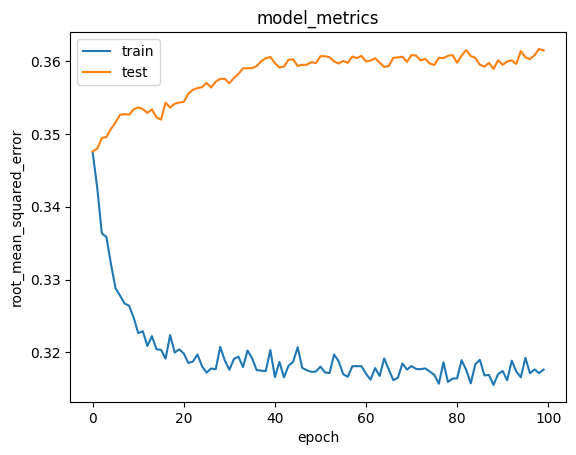

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Recommendation

 THis code chunk identifies places visited by a user, predicts ratings for unvisited places, and generates top recommendations based on the user's preferences.









In [ ]:
place_df = tourism_new
df = pd.read_csv('/content/tourism_rating.csv')

user_id = df.User_Id.sample(1).iloc[0]
place_visited_by_user = df[df.User_Id == user_id]

place_not_visited = place_df[~place_df['id'].isin(place_visited_by_user['Place_Id'].values)]['id']
place_not_visited = list(
    set(place_not_visited)
    .intersection(set(place_to_place_encoded.keys()))
)

place_not_visited = [[place_to_place_encoded.get(x)] for x in place_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_place_array = np.hstack(
    ([[user_encoder]] * len(place_not_visited), place_not_visited)
)

In [ ]:
ratings = model.predict(user_place_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_place_ids = [
    place_encoded_to_place.get(place_not_visited[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Place with high ratings from user')
print('----' * 8)

top_place_user = (
    place_visited_by_user.sort_values(
        by = 'Place_Ratings',
        ascending=False
    )
    .head(5)
    .Place_Id.values
)

place_df_rows = place_df[place_df['id'].isin(top_place_user)]
pd.DataFrame(place_df_rows)

13/13 [==============================] - 0s 2ms/step
Showing recommendations for users: 65
Place with high ratings from user
--------------------------------


,id,name,category,description,city,city_category
153,303,Masjid Al-Imtizaj,Tempat Ibadah,Masjid Al Imtizaj adalah salah satu masjid yan...,Bandung,Bandung Tempat Ibadah
168,25,Pasar Tanah Abang,Pusat Perbelanjaan,Pasar Tanah Abang atau Pasar Sabtu dibangun ol...,Jakarta,Jakarta Pusat Perbelanjaan
170,164,Pintoe Langit Dahromo,Cagar Alam,Pintu Langit Dahromo ini menyediakan berbagai ...,Yogyakarta,Yogyakarta Cagar Alam
271,252,Kampoeng Tulip,Taman Hiburan,Kampoeng Tulip ialah salah satu objek wisata d...,Bandung,Bandung Taman Hiburan
287,32,Setu Babakan,Budaya,Setu Babakan atau Danau Babakan terletak di Sr...,Jakarta,Jakarta Budaya


In [ ]:
print('----' * 8)
print('Top 10 place recommendation')
print('----' * 8)

recommended_place = place_df[place_df['id'].isin(recommended_place_ids)]
recommended_place

--------------------------------
Top 10 place recommendation
--------------------------------


,id,name,category,description,city,city_category
15,336,Grand Maerakaca,Taman Hiburan,Masyarakat Jawa Tengah mungkin sudah tidak asi...,Semarang,Semarang Taman Hiburan
31,322,Bukit Jamur,Cagar Alam,Bukit Jamur Ciwidey adalah satu dari sekian ba...,Bandung,Bandung Cagar Alam
53,321,Glamping Lakeside Rancabali,Taman Hiburan,Glamping Lakeside Rancabali menawarkan tempat ...,Bandung,Bandung Taman Hiburan
120,346,Indonesia Kaya Park,Taman Hiburan,Lokasi Taman Indonesia Kaya yang berada di pus...,Semarang,Semarang Taman Hiburan
125,335,Candi Gedong Songo,Budaya,Candi Gedong Songo (bahasa Jawa: ꦕꦤ꧀ꦝꦶ​ꦒꦼꦝꦺꦴꦁ​...,Semarang,Semarang Budaya
127,334,Chingu Cafe Little Seoul,Taman Hiburan,Selain populer karena memiliki pemandangan yan...,Bandung,Bandung Taman Hiburan
258,340,Desa Wisata Lembah Kalipancur,Taman Hiburan,Wisata alam tengah menjadi sorotan bagi dunia ...,Semarang,Semarang Taman Hiburan
292,332,Rainbow Garden,Cagar Alam,Rainbow Garden Harapan Indah salah satu taman ...,Bandung,Bandung Cagar Alam
316,333,Kota Mini,Taman Hiburan,Destinasi yang sangat menarik bernuansa eropa ...,Bandung,Bandung Taman Hiburan
389,345,Kampoeng Djadhoel Semarang,Budaya,Kampoeng Djadhoel terletak di Kampung Batik Se...,Semarang,Semarang Budaya
